In [1]:
from pymatgen.matproj.rest import MPRester
from pymatgen.phasediagram.maker import PhaseDiagram

%matplotlib inline

## Generating the phase diagram

To generate a phase diagram, we obtain entries from the Materials Project and call the PhaseDiagram class in pymatgen.

In [2]:
#This initializes the REST adaptor. You may need to put your own API key in as an arg.
a = MPRester()

#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the Ca-C-O system.
entries = a.get_entries_in_chemsys(['Ca', 'C', 'O'])

#With entries, you can do many sophisticated analyses, like creating phase diagrams.
pd = PhaseDiagram(entries)

## Plotting the phase diagram

To plot a phase diagram, we send our phase diagram object into the PDPlotter class.

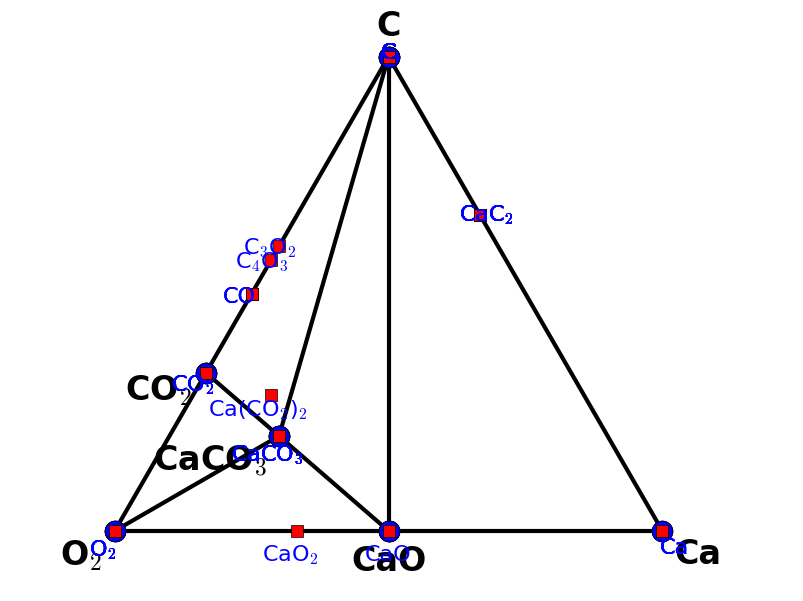

In [3]:
from pymatgen.phasediagram.plotter import PDPlotter
#Let's show all phases, including unstable ones
plotter = PDPlotter(pd, show_unstable=True)
plotter.show()

## Calculating energy above hull and other phase equilibria properties

To perform more sophisticated analyses, use the PDAnalyzer object.

In [4]:
from pymatgen.phasediagram.analyzer import PDAnalyzer
a = PDAnalyzer(pd)

In [5]:
import collections

data = collections.defaultdict(list)
for e in entries:
    decomp, ehull = a.get_decomp_and_e_above_hull(e)
    data["Materials ID"].append(e.entry_id)
    data["Composition"].append(e.composition.reduced_formula)
    data["Ehull"].append(ehull)    
    data["Decomposition"].append(" + ".join(["%.2f %s" % (v, k.composition.formula) for k, v in decomp.items()]))

from pandas import DataFrame
df = DataFrame(data, columns=["Materials ID", "Composition", "Ehull", "Decomposition"])

print(df)

   Materials ID Composition     Ehull                           Decomposition
0         mp-45          Ca  0.000508                                1.00 Ca2
1      mp-10683          Ca  0.396161                                1.00 Ca2
2         mp-21          Ca  0.013583                                1.00 Ca2
3        mp-166          Ca  0.013329                                1.00 Ca2
4        mp-132          Ca  0.000000                                1.00 Ca2
5    mp-1008498          Ca  0.152771                                1.00 Ca2
6     mp-990424           C  0.004827                                1.00 C16
7        mp-169           C  0.004413                                1.00 C16
8     mp-632329           C  0.110332                                1.00 C16
9         mp-66           C  0.135631                                1.00 C16
10        mp-47           C  0.160479                                1.00 C16
11    mp-569416           C  0.028801                           